In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config('spark.driver.host','localhost') \
    .appName("MovieRecommendation") \
    .getOrCreate()


In [2]:
data = spark.read.csv('imdb_movies.csv', header=True, inferSchema=True)


In [3]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
data.limit(5)

names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
Creed III,03/02/2023,73.0,"Drama, Action",After dominating ...,Michael B. Jordan...,Creed III,Released,English,75000000.0,271616668.0,AU
Avatar: The Way o...,12/15/2022,78.0,"Science Fiction, ...",Set more than a d...,"Sam Worthington, ...",Avatar: The Way o...,Released,English,460000000.0,2316794914.0,AU
The Super Mario B...,04/05/2023,76.0,"Animation, Advent...",While working und...,"Chris Pratt, Mari...",The Super Mario B...,Released,English,100000000.0,724459031.0,AU
Mummies,01/05/2023,70.0,"Animation, Comedy...",Through a series ...,"Óscar Barberán, T...",Momias,Released,"Spanish, Castilian",12300000.0,34200000.0,AU
Supercell,03/17/2023,61.0,Action,Good-hearted teen...,"Skeet Ulrich, Roy...",Supercell,Released,English,77000000.0,340941958.6,US


In [4]:
data.printSchema()

root
 |-- names: string (nullable = true)
 |-- date_x: string (nullable = true)
 |-- score: double (nullable = true)
 |-- genre: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- crew: string (nullable = true)
 |-- orig_title: string (nullable = true)
 |-- status: string (nullable = true)
 |-- orig_lang: string (nullable = true)
 |-- budget_x: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- country: string (nullable = true)



In [5]:
data.describe().toPandas()

,summary,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,count,10178,10178,10178,10093,10178,10127,10177,10177,10178,10178,10178,10178
1,mean,1353.4375,None,63.49705246610336,None,None,None,1417.9333333333334,None,1156.0,6.5359277139727734E7,2.514413894199379E8,1.9945528751166666E8
2,stddev,1881.4487669080975,None,13.53701236247771,None,None,None,1923.79162320762,None,1210.5668093913694,5.724161788282733E7,2.7607145140185404E8,2.756372328502867E8
3,min,"""One Piece """"3D2Y"""": Overcome Ace's Death! Luf...",01/01/1952,0.0,Action,"""""""Barbie"""" stars as Clara in this animated re...","""""Déjà vu"""" and """"Operation Y"""". The plot fol...",,"""""Anya"""" encounters two Russian men seeking a...",,"""""El Doc"""" Debauza",,"""""Dunce"""""
4,max,솔라 플라워,12/31/2023,100.0,"Western, Thriller","“NARUTO to BORUTO THE LIVE 2019”, a special ev...","이미선, , Min Jung, , Kim Soo-ji,",솔라 플라워,Nick and Jacob take him for another trip in t...,xXx,Zambezia,Young Guns II,ZA


In [6]:
data.columns

['names',
 'date_x',
 'score',
 'genre',
 'overview',
 'crew',
 'orig_title',
 'status',
 'orig_lang',
 'budget_x',
 'revenue',
 'country']

In [7]:
from pyspark.sql.functions import avg
data.select(avg("budget_x")).show()

+--------------------+
|       avg(budget_x)|
+--------------------+
|6.5359277139727734E7|
+--------------------+



In [8]:
from pyspark.sql.functions import avg, round

# Calculate the average score per genre
average_score_per_genre = data.groupBy("genre").agg(round(avg("score"), 2).alias("average_score"))

# Show the result
average_score_per_genre.show()


+--------------------+-------------+
|               genre|average_score|
+--------------------+-------------+
|Action, Animation...|        69.25|
|Mystery, Thriller...|         56.0|
|Western, Drama, A...|         75.0|
|Action, Adventure...|         53.2|
|Animation, Scienc...|         63.0|
|Comedy, Adventure...|         63.0|
|Thriller, Action,...|         60.0|
|Drama, Romance, M...|         66.5|
|Animation, Action...|        69.33|
|Crime, Action, Sc...|         67.5|
|    Animation, Music|         71.0|
|Action, Crime, Th...|          0.0|
|Action, Comedy, D...|         63.0|
|Animation, Romanc...|         70.0|
|Action, Crime, My...|        66.33|
|       Comedy, Drama|         65.7|
|Animation, Fantas...|         82.0|
|Thriller, Action,...|         68.0|
|Animation, Action...|        66.33|
|Adventure, Comedy...|        63.83|
+--------------------+-------------+
only showing top 20 rows



In [9]:
average_budget_revenue_per_genre = data.groupBy("genre").agg(avg("budget_x").alias("average_budget"), avg("revenue").alias("average_revenue"))
average_budget_revenue_per_genre.show()


+--------------------+--------------------+--------------------+
|               genre|      average_budget|     average_revenue|
+--------------------+--------------------+--------------------+
|Action, Animation...|1.0870571428571428E8| 4.178273185428571E8|
|Mystery, Thriller...|             1.092E8|       2.600905784E8|
|Western, Drama, A...|              1.35E8|        5.32938302E8|
|Action, Adventure...|             4.585E7|       1.844334688E8|
|Animation, Scienc...|             8.245E7|       4.955803668E8|
|Comedy, Adventure...|               2.0E7|         6.2634998E7|
|Thriller, Action,...|              3.25E7|        4.89478195E7|
|Drama, Romance, M...|             8.425E7|       4.534580032E8|
|Animation, Action...|            1.1925E8| 3.679417684666667E8|
|Crime, Action, Sc...|               5.3E7|         8.1528912E7|
|    Animation, Music|              6.98E7|       4.662727008E8|
|Action, Crime, Th...|            2.3194E8|       1.752699988E8|
|Action, Comedy, D...|   

In [10]:
from pyspark.sql.functions import length

overview_length = data.withColumn("overview_length", length("overview"))
longest_overview = overview_length.orderBy(overview_length["overview_length"].desc()).select("orig_title", "overview_length").limit(1)
shortest_overview = overview_length.orderBy(overview_length["overview_length"]).select("orig_title", "overview_length").limit(1)
longest_overview.show()
shortest_overview.show()


+---------------------------------+---------------+
|                       orig_title|overview_length|
+---------------------------------+---------------+
| さよならの朝に約束の花をかざろう|            998|
+---------------------------------+---------------+

+----------+---------------+
|orig_title|overview_length|
+----------+---------------+
| កំណើតអរូប|             12|
+----------+---------------+



In [11]:
from pyspark.sql.functions import col
budget_min = 1000000  # Example minimum budget
budget_max = 5000000  # Example maximum budget
movies_in_budget_range = data.filter((col("budget_x") >= budget_min) & (col("budget_x") <= budget_max))
movies_in_budget_range.limit(5).toPandas()


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,13 Exorcisms,11/04/2022,55.0,"Drama, Horror","After participating in a séance, young Laura b...","María Romanillos, Laura, Ruth Díaz, Carmen, Ur...",13 exorcismos,Released,"Spanish, Castilian",2480000.0,1891519.0,ES
1,Fall,09/22/2022,73.0,"Thriller, Drama","For best friends Becky and Hunter, life is all...","Grace Caroline Currey, Becky, Virginia Gardner...",Fall,Released,English,3000000.0,16120263.0,AU
2,Lord of the Streets,04/22/2022,52.0,Action,When Jason Dyson refuses to make his prized fi...,"Treach, Jason Dyson, Quinton Jackson, Kane, Kh...",Lord of the Streets,Released,English,1000000.0,22790427.2,US
3,The Whale,02/02/2023,81.0,Drama,A reclusive English teacher suffering from sev...,"Brendan Fraser, Charlie, Sadie Sink, Ellie, Ho...",The Whale,Released,English,3000000.0,36752010.0,AU
4,Sniper: The White Raven,08/24/2022,76.0,"War, Drama",Mykola is an eccentric pacifist who wants to b...,"Pavlo Aldoshyn, Mykola, Maryna Koshkina, Nasti...",Снайпер. Білий ворон,Released,Ukrainian,1000000.0,102414815.2,UA


In [12]:
crew_name_pattern = "María"  
movies_with_crew_name = data.filter(data["crew"].like("%{}%".format(crew_name_pattern)))
movies_with_crew_name.select('names','date_x','overview','crew','orig_lang').toPandas()


,names,date_x,overview,crew,orig_lang
0,Mummies,01/05/2023,"Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...","Spanish, Castilian"
1,The Exorcist,11/02/2022,"Ophelia, a young nun recently arriving in the ...","María Evoli, Ofelia, Diana Bracho, , Tina Rome...","Spanish, Castilian"
2,13 Exorcisms,11/04/2022,"After participating in a séance, young Laura b...","María Romanillos, Laura, Ruth Díaz, Carmen, Ur...","Spanish, Castilian"
3,The Last Heretic,11/09/2022,Juan Conte is a world-renowned spokesman of th...,"Germán Palacios, Juan Conte, Victoria Almeida,...","Spanish, Castilian"
4,There Are No Saints,07/01/2022,A man is imprisoned for a crime he didn't comm...,"José María Yázpik, Neto Niente, Shannyn Sossam...",English
...,...,...,...,...,...
91,The Limehouse Golem,10/18/2016,A series of murders has shaken the community t...,"Bill Nighy, John Kildare, Olivia Cooke, Lizzie...",English
92,Out of the Clear Blue Sky,12/24/2019,"Returning to Earth as an imitator, the legenda...","Omar Chaparro, , Ana Claudia Talancón, , Steph...","Spanish, Castilian"
93,Cracks,12/04/2009,Jealousy flares after the headmistress of an e...,"Eva Green, Miss Gribben, Juno Temple, Di Radfi...",English
94,Fever Dream,10/06/2021,"A woman named Amanda lies stricken, far from h...","María Valverde, Amanda, Guillermo Pfening, Mar...","Spanish, Castilian"


In [13]:
specific_genre = "Action"  # Example genre
movies_with_genre = data.filter(col("genre").like("%{}%".format(specific_genre)))
movies_with_genre.toPandas()


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,340941958.6,US
3,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,351349364.0,AU
4,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,254946484.2,US
...,...,...,...,...,...,...,...,...,...,...,...,...
2747,K.G.F: Chapter 2,04/14/2022,76.0,"Action, Crime, Drama",The blood-soaked land of Kolar Gold Fields (KG...,"Yash, Raja Krishnappa Bairya 'Rocky', Sanjay D...",ಕೆ.ಜಿ.ಎಫ್: Chapter 2,Released,Kannada,13000000.0,90410749.0,IN
2748,Nighthawks,04/04/1981,64.0,"Action, Crime, Thriller",An international terrorist has New York in a g...,"Sylvester Stallone, Det. Sgt. Deke DaSilva, Ru...",Nighthawks,Released,English,5000000.0,19600000.0,US
2749,The Seven Deadly Sins: Prisoners of the Sky,08/18/2018,76.0,"Action, Adventure, Fantasy, Animation","Traveling in search of the rare ingredient, “s...","Yuki Kaji, Meliodas (voice), Sora Amamiya, Eli...",劇場版 七つの大罪 天空の囚われ人,Released,Japanese,62600000.0,706002070.8,JP
2750,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6698361.0,US


In [14]:
specific_country = "US"
movies_in_specific_country = data.filter(data["country"] == specific_country).select("orig_title")
movies_in_specific_country.show()


+--------------------+
|          orig_title|
+--------------------+
|           Supercell|
|     Attack on Titan|
|            The Park|
|The Devil Conspiracy|
|Batman: The Doom ...|
|        Consecration|
|Shark Side of the...|
|Money Shot: The P...|
|            Die Hart|
|H.P. Lovecraft's ...|
|                Sick|
|Legion of Super-H...|
| Lord of the Streets|
|        Little Dixie|
|  Prey for the Devil|
|              Bandit|
|The Simpsons Meet...|
|Encanto at the Ho...|
|On a Wing and a P...|
|            Breaking|
+--------------------+
only showing top 20 rows



In [15]:
specific_movie_title = "The Avengers"  # Example movie title
crew_for_specific_movie = data.filter(data["orig_title"] == specific_movie_title).select("crew")
crew_for_specific_movie.show(truncate=False)  


+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|crew                                                                                                                                                                                                                                                                                                                                  |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Robert Downe

In [16]:
recom_data = data.select(*data.columns)

In [17]:
df=recom_data.toPandas()

In [18]:
df.head(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,724459031.0,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,34200000.0,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,340941958.6,US


In [19]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
df.isnull().sum()


names          0
date_x         0
score          0
genre         85
overview       0
crew          51
orig_title     1
status         1
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [21]:
pd.DataFrame(df.nunique())

,0
names,9660
date_x,5688
score,79
genre,2303
overview,9905
crew,9918
orig_title,9744
status,678
orig_lang,588
budget_x,2692


In [22]:

duplicate=df[df.duplicated("orig_title")]
duplicate["orig_title"].value_counts()

orig_title
Pinocchio                                                                                                                                                                                                                                                                                                                                                                         11
Halloween                                                                                                                                                                                                                                                                                                                                                                          8
King Kong                                                                                                                                                                                                                                          

In [23]:
# drop that duplicate values row
df.drop_duplicates(subset="orig_title",inplace=True)

In [24]:
df.drop_duplicates()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,724459031.0,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,34200000.0,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,340941958.6,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9353729.0,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6698361.0,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,22997992.0,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,475661306.0,US


In [25]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         81
overview       0
crew          48
orig_title     1
status         1
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [26]:
# convert the "date_x" dtype from : Object ---to--> Datetime 
df["date_x"]=df["date_x"].str.strip()
df["date_x"]=pd.to_datetime(df["date_x"],format="%m/%d/%Y")
# Split year and month in seperate columns
df["Release_year"]=df["date_x"].dt.year
df["Release_month"]=df["date_x"].dt.month

In [27]:
df=df.dropna()

In [28]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country', 'Release_year',
       'Release_month'],
      dtype='object')

In [29]:
df_copy=df.copy()

C:\Users\sridh\AppData\Local\Temp\ipykernel_17008\785516563.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df["Release_year"], bins=40))["names"].agg("count").plot(kind="bar", color=colors)


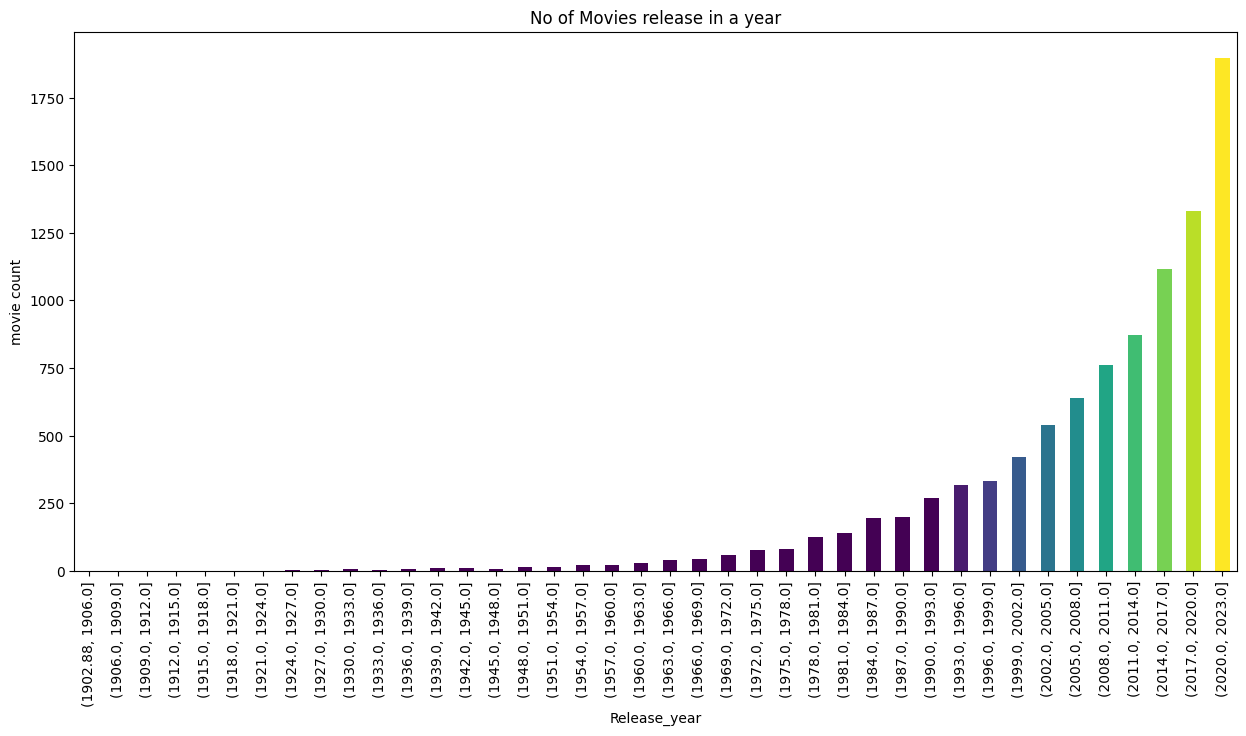

In [30]:
# Assuming 'df' is your DataFrame
colors = plt.cm.viridis(np.linspace(-3, 1, 40))  # to create some color combinations
plt.figure(figsize=(15,7))

# Use groupby on DataFrame directly, not on a specific column
df.groupby(pd.cut(df["Release_year"], bins=40))["names"].agg("count").plot(kind="bar", color=colors)

plt.title("No of Movies release in a year")
plt.ylabel("movie count")
plt.show()


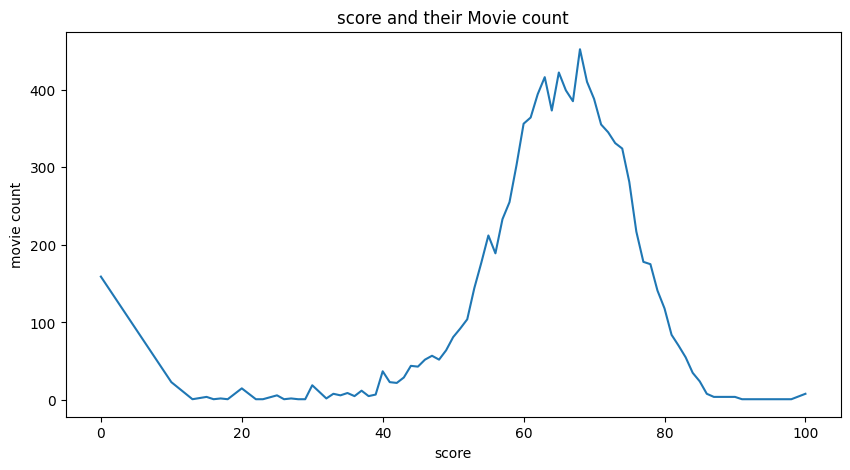

In [31]:
# plot depend on score 
plt.figure(figsize=(10,5))
df.groupby("score")["names"].agg("count").plot(kind="line")
plt.title("score and their Movie count")
plt.ylabel("movie count")
plt.show()

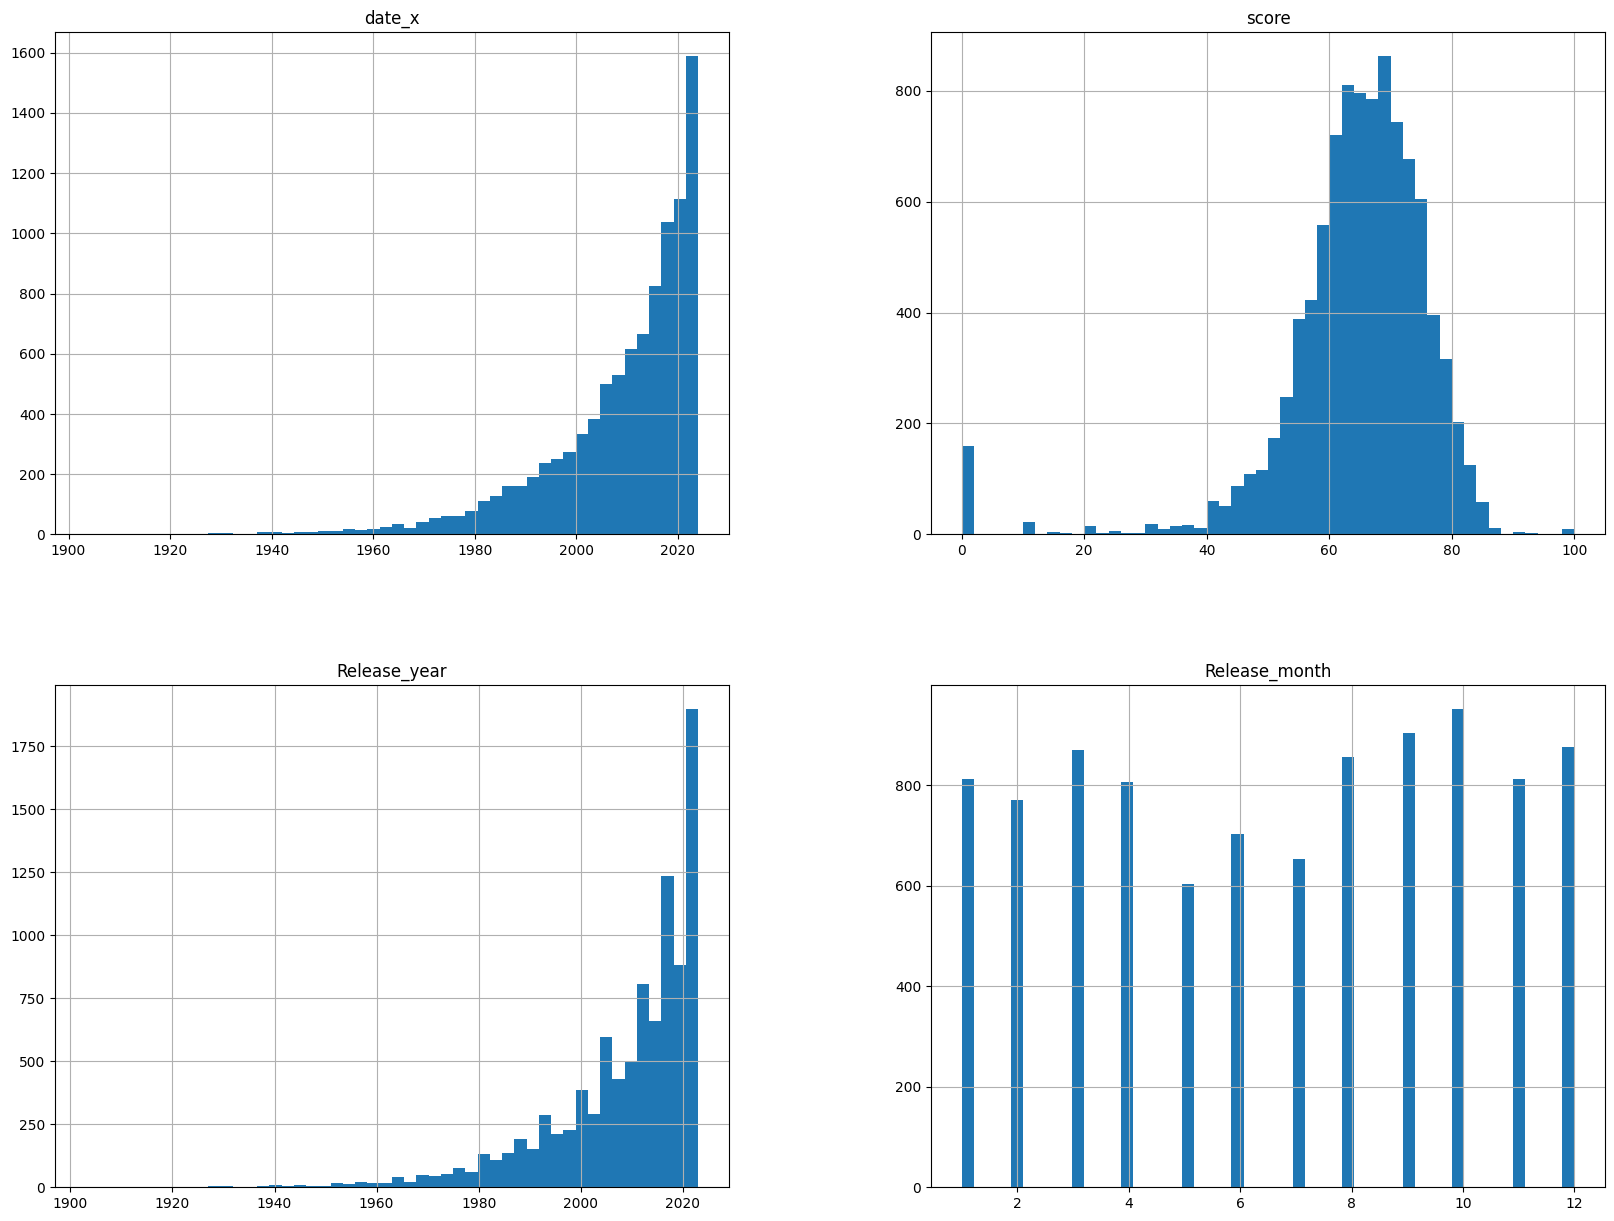

In [32]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
df['genre'].str.strip()

0                                            Drama, Action
1                       Science Fiction, Adventure, Action
2            Animation, Adventure, Family, Fantasy, Comedy
3            Animation, Comedy, Family, Adventure, Fantasy
4                                                   Action
                               ...                        
10173                                                Drama
10174                                               Action
10175                             Drama, Thriller, Romance
10176    Action, Adventure, Science Fiction, Thriller, ...
10177                           Animation, Family, Fantasy
Name: genre, Length: 9625, dtype: object

In [34]:
df['genre'] = df['genre'].str.strip()

In [35]:
df = df.rename(columns={'budget_x': 'budget_mil', 
                        'revenue': 'revenue_mil', 
                        'date_x': 'date', 
                        'country': 'release_country'}) 

In [36]:
df.dropna(subset=['genre'], inplace=True) #dropping NA
df.reset_index(drop=True, inplace=True)

In [37]:
df.dropna(subset=['crew'], inplace=True) #dropping NA
df.reset_index(drop=True, inplace=True)

In [108]:
df.isna().sum()

names               0
date                0
score               0
genre               0
overview            0
crew                0
orig_title          0
status              0
orig_lang           0
budget_mil          0
revenue_mil         0
release_country     0
Release_year        0
Release_month       0
income_mil          0
year                0
primary_genre       0
budget_tier         0
profitable          0
Action              0
Adventure           0
Animation           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
History             0
Horror              0
Music               0
Mystery             0
Romance             0
Science Fiction     0
TV Movie            0
Thriller            0
War                 0
Western             0
 Action             0
 Adventure          0
 Animation          0
 Comedy             0
 Crime              0
 Documentary        0
 Drama              0
 Family   

In [109]:
df=df.dropna()

In [38]:
import pandas as pd

# Assuming df is your DataFrame and 'budget_mil' is the column with mixed numeric and non-numeric values
df['budget_mil'] = pd.to_numeric(df['budget_mil'].str.replace(r'\D', '', regex=True), errors='coerce').astype(float) / 10**6


In [39]:
df['budget_mil']

0        750.000000
1       4600.000000
2       1000.000000
3        123.000000
4        770.000000
           ...     
9620      70.000000
9621      91.458178
9622     218.000000
9623    1160.000000
9624     924.000000
Name: budget_mil, Length: 9625, dtype: float64

In [40]:
import pandas as pd

# Assuming df is your DataFrame and 'budget_mil' is the column with mixed numeric and non-numeric values
df['revenue_mil'] = pd.to_numeric(df['revenue_mil'].str.replace(r'\D', '', regex=True), errors='coerce').astype(float) / 10**6


In [41]:
df['income_mil'] = (df['revenue_mil'] - df['budget_mil'])

In [42]:
type = df.dtypes
print(type)

names                      object
date               datetime64[ns]
score                     float64
genre                      object
overview                   object
crew                       object
orig_title                 object
status                     object
orig_lang                  object
budget_mil                float64
revenue_mil               float64
release_country            object
Release_year                int32
Release_month               int32
income_mil                float64
dtype: object


In [43]:
df['budget_mil'] = df['budget_mil'].round(2)
df['revenue_mil'] = df['revenue_mil'].round(2)
df['income_mil'] = df['income_mil'].round(2)

In [44]:
df['date'] = pd.to_datetime(df['date']) 
df['year'] = df['date'].dt.year #creating a new year column

In [45]:
df['primary_genre'] = df['genre'].apply(lambda x: x.split(',')[0]) #creating a primary genre column
df['budget_tier'] = df['budget_mil'].apply(lambda x: "Low" if x < 5 \
                                             else "Mid" if 5 <= x <= 50 \
                                             else "High" if 50 < x <= 150 \
                                             else "Blockbuster") #creating a column with budget tier for every row
df['profitable'] = df['income_mil'].apply(lambda x: "Yes" if x > 0 else "No")

In [46]:
df.describe()

,date,score,budget_mil,revenue_mil,Release_year,Release_month,income_mil,year
count,9625,9625.000000,8967.000000,9109.000000,9625.000000,9625.000000,8960.000000,9625.000000
mean,2008-10-31 11:33:26.649350656,63.830545,652.521913,2519.913346,2008.324260,6.648104,1898.044901,2008.324260
min,1903-05-15 00:00:00,0.000000,0.000000,0.000000,1903.000000,1.000000,-3400.000000,1903.000000
25%,2002-08-16 00:00:00,59.000000,150.000000,273.060000,2002.000000,3.000000,55.015000,2002.000000
50%,2013-07-31 00:00:00,65.000000,514.000000,1518.130000,2013.000000,7.000000,899.680000,2013.000000
75%,2019-11-08 00:00:00,71.000000,1057.410000,4198.180000,2019.000000,10.000000,3242.810000,2019.000000
max,2023-12-31 00:00:00,100.000000,4600.000000,29237.060000,2023.000000,12.000000,26867.060000,2023.000000
std,NaN,12.872273,568.031224,2752.855375,14.882202,3.525691,2414.278535,14.882202


In [47]:
df = df[df.score != 0]
df = df[df.revenue_mil != 0]
df = df[df.budget_mil != 0]

In [48]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
date,9379,2008-08-11 15:46:41.620642048,1903-05-15 00:00:00,2002-04-21 00:00:00,2013-03-21 00:00:00,2019-08-30 00:00:00,2023-12-31 00:00:00,NaN
score,9379.0,64.912891,10.0,60.0,66.0,72.0,100.0,9.937788
budget_mil,8737.0,634.709935,0.01,150.0,500.0,1036.0,4600.0,543.342196
revenue_mil,8875.0,2558.83609,0.01,280.915,1501.23,4273.04,29237.06,2774.796587
Release_year,9379.0,2008.10097,1903.0,2002.0,2013.0,2019.0,2023.0,14.865113
Release_month,9379.0,6.670007,1.0,3.0,7.0,10.0,12.0,3.536057
income_mil,8736.0,1953.750599,-1995.49,80.445,985.33,3293.9,26867.06,2417.48144
year,9379.0,2008.10097,1903.0,2002.0,2013.0,2019.0,2023.0,14.865113


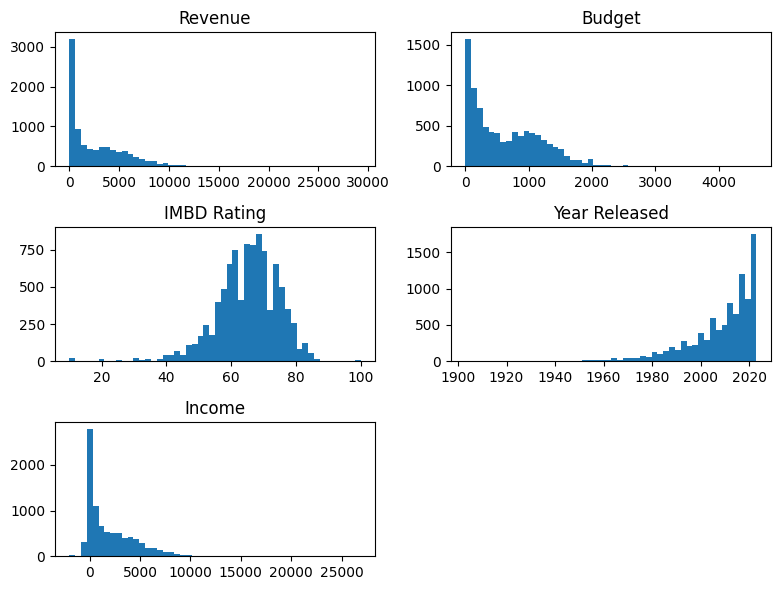

In [49]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(8,6))
his1= df['score']
his2= df['budget_mil']
his3= df['revenue_mil']
his4= df['year']
his5= df['income_mil']

axes[0,0].hist(his3, bins=50)
axes[0,0].set_title('Revenue')
axes[0,1].hist(his2, bins=50)
axes[0,1].set_title('Budget')
axes[1,0].hist(his1, bins=50)
axes[1,0].set_title('IMBD Rating')
axes[1,1].hist(his4, bins=50)
axes[1,1].set_title('Year Released')
axes[2,0].hist(his5, bins=50)
axes[2,0].set_title('Income')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [50]:
import seaborn as sns

<Axes: xlabel='budget_tier', ylabel='revenue_mil'>

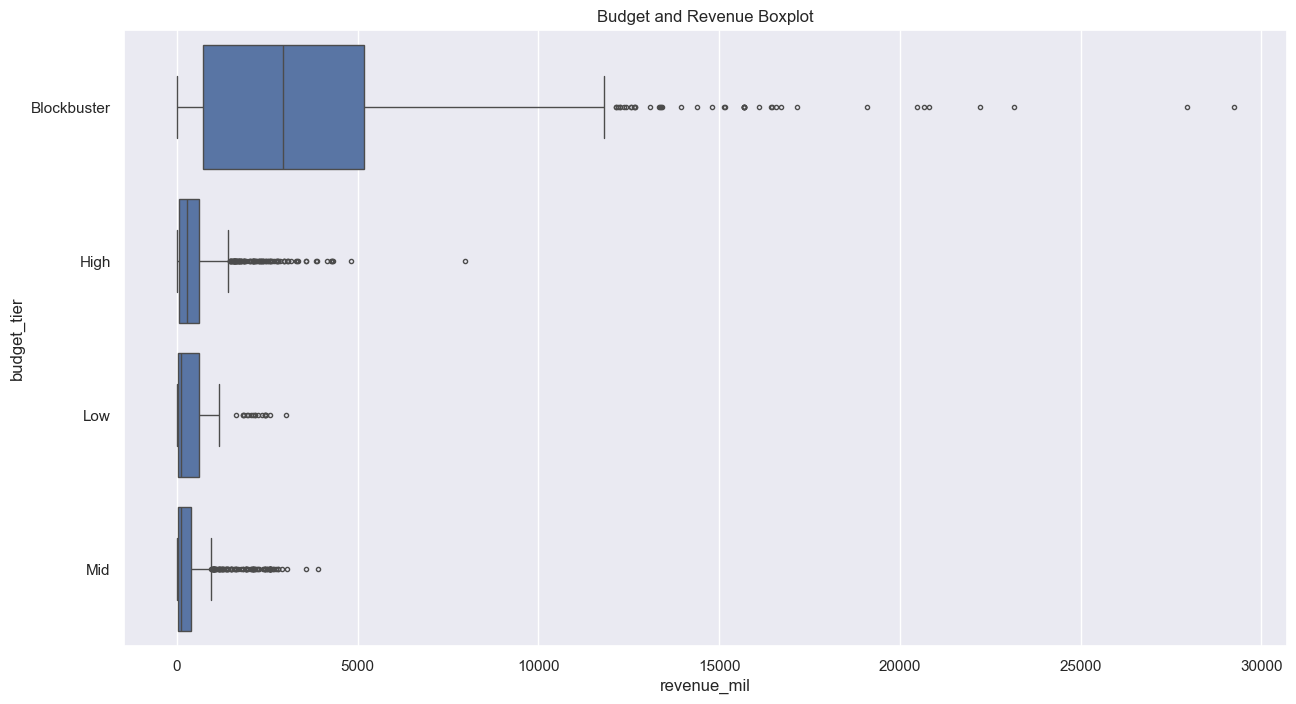

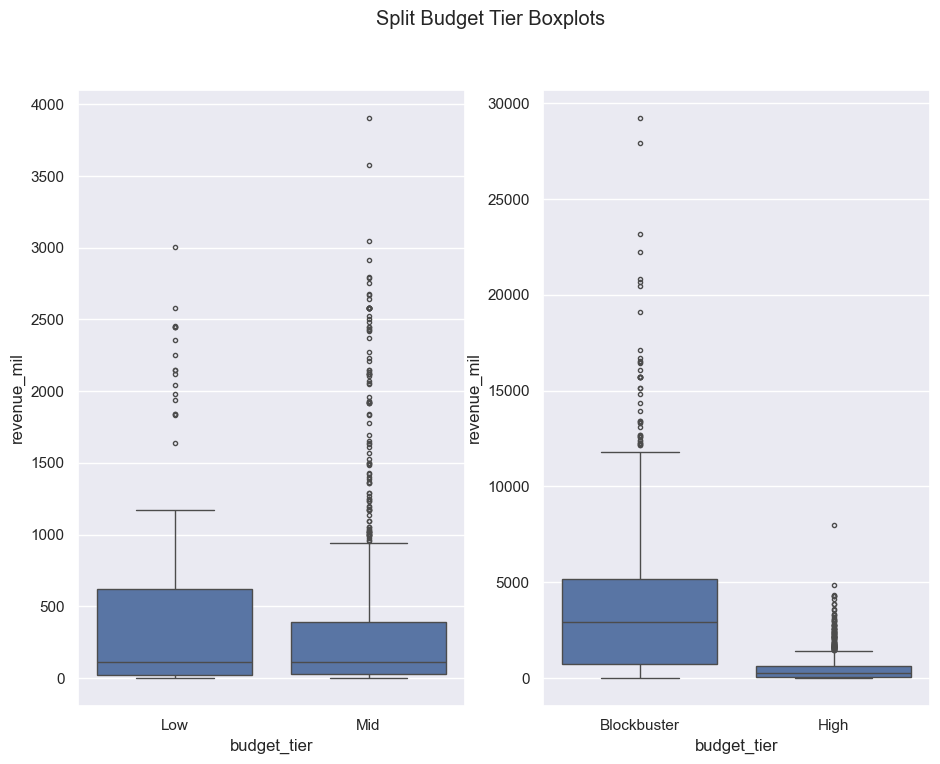

In [51]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.boxplot(data=df, x="revenue_mil", y="budget_tier", fliersize=3).set_title('Budget and Revenue Boxplot')

low_mid_tier = df[df['budget_tier'].isin(['Low','Mid'])]
high_bb_tier = df[df['budget_tier'].isin(['High','Blockbuster'])]

fig, axes = plt.subplots(1, 2, figsize=(11, 8))
fig.suptitle('Split Budget Tier Boxplots')

sns.boxplot(ax=axes[0], data=df, y='revenue_mil', x=low_mid_tier['budget_tier'],orient='v',fliersize=3)
sns.boxplot(ax=axes[1], data=df, y='revenue_mil', x=high_bb_tier['budget_tier'],orient='v',fliersize=3)

In [52]:
old_movie_count = df[df['year'] <= 1980].count()
old_movie_count

names              527
date               527
score              527
genre              527
overview           527
crew               527
orig_title         527
status             527
orig_lang          527
budget_mil         486
revenue_mil        494
release_country    527
Release_year       527
Release_month      527
income_mil         486
year               527
primary_genre      527
budget_tier        527
profitable         527
dtype: int64

In [53]:
df_adj = df[df['year'] >= 1980]

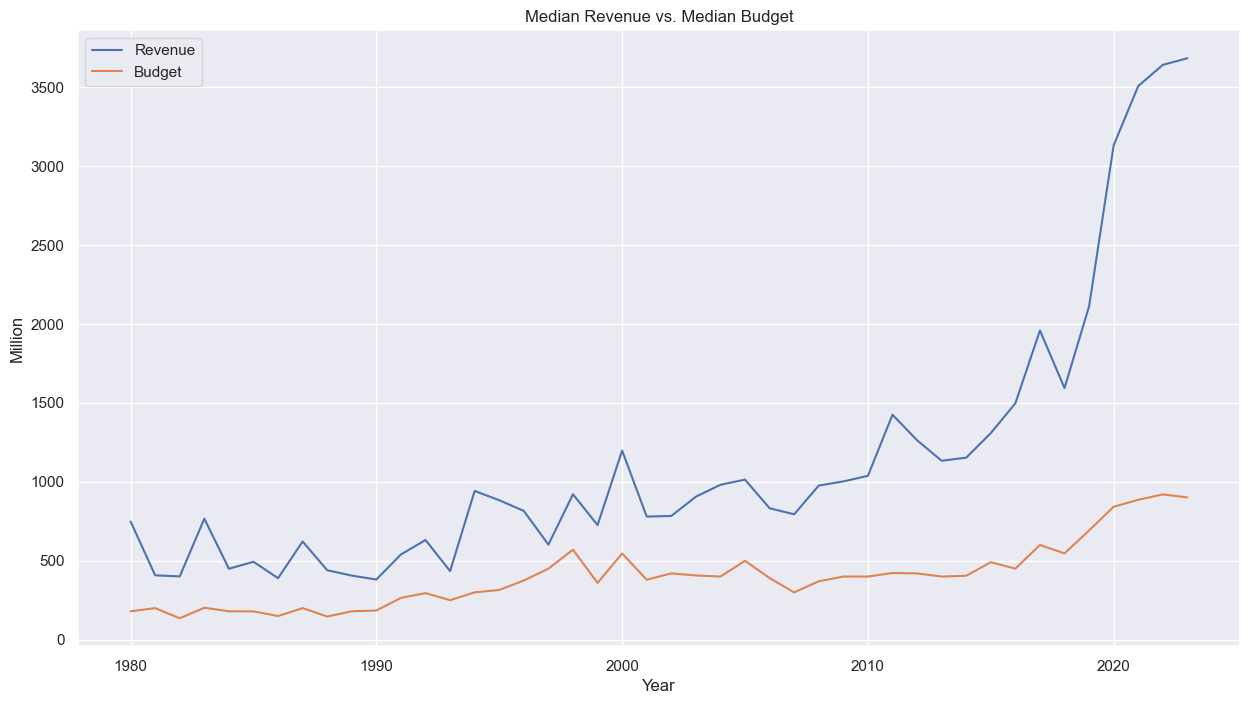

In [54]:
df_revsum = df_adj.groupby('year')['revenue_mil'].median()
df_revsum.plot()
df_revbudget = df_adj.groupby('year')['budget_mil'].median()
df_revbudget.plot()

plt.title('Median Revenue vs. Median Budget')
plt.ylabel('Million')
plt.xlabel('Year')
plt.legend(["Revenue","Budget"], loc=2)

Text(0.5, 1.0, 'Median Revenue by Movie Genres (2000-2023)')

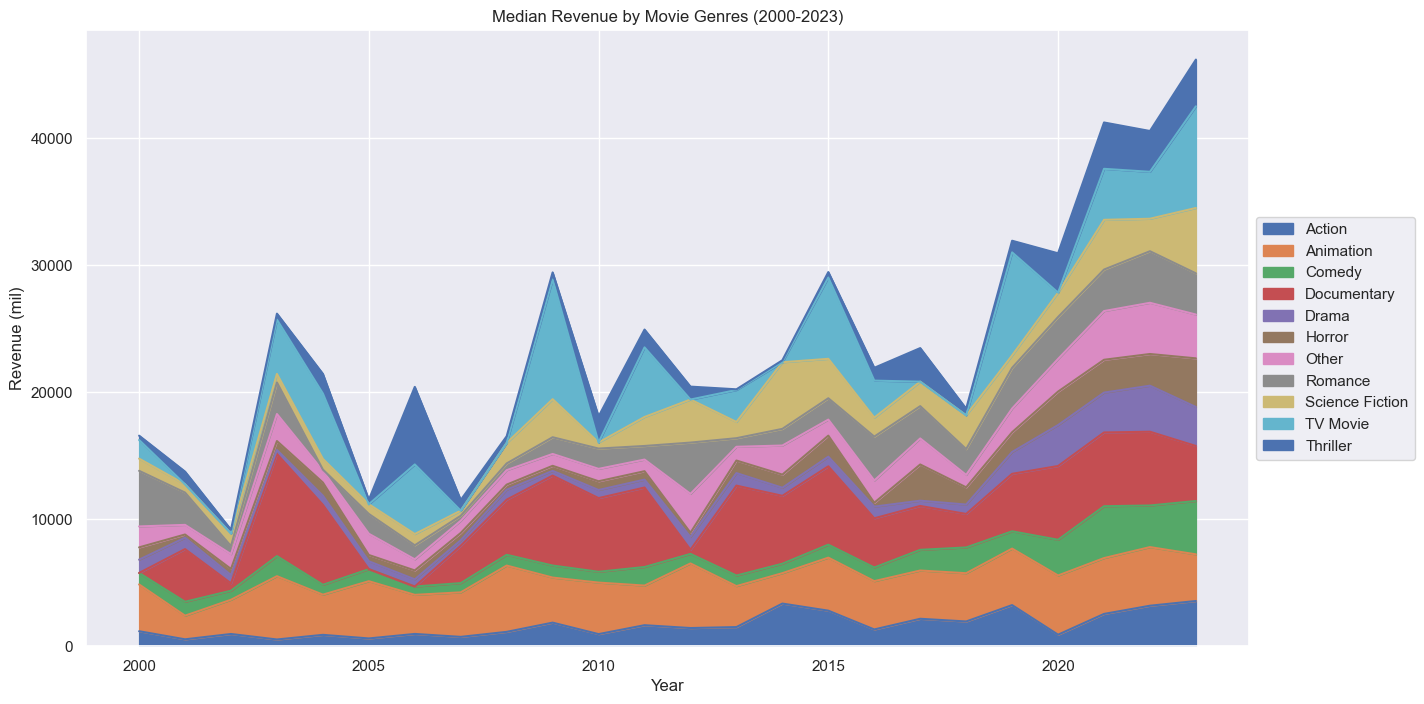

In [55]:
genres_to_replace = ['Adventure', 'Crime', 'Family', 'Fantasy', 'History',
                     'Music', 'Mystery', 'War', 'Western']
df_replaced = df_adj.copy()
df_replaced['primary_genre'] = df_adj['primary_genre'].replace(genres_to_replace, 'Other')

df_rev_growth = df_replaced[df_replaced['year'] >=2000]
table = pd.pivot_table(df_rev_growth,values='revenue_mil', index='year', columns='primary_genre', aggfunc='median')
table.plot(kind='area')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Revenue (mil)')
plt.xlabel('Year')
plt.title('Median Revenue by Movie Genres (2000-2023)')

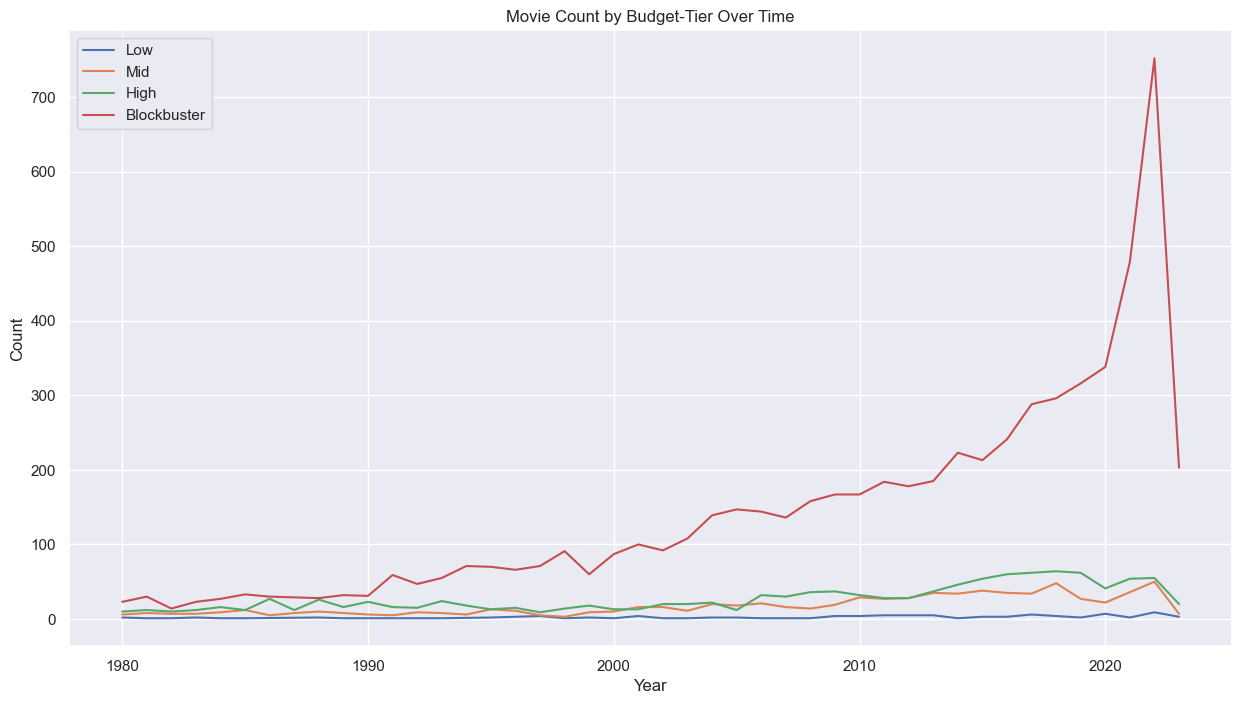

In [56]:
low_t = df_adj[df_adj['budget_tier'] == 'Low']
mid_t = df_adj[df_adj['budget_tier'] == 'Mid']
high_t = df_adj[df_adj['budget_tier'] == 'High']
bb_t = df_adj[df_adj['budget_tier'] == 'Blockbuster']

df_low_t = low_t.groupby('year')['budget_tier'].count()
df_low_t.plot()
df_mid_t = mid_t.groupby('year')['budget_mil'].count()
df_mid_t.plot()
df_high_t = high_t.groupby('year')['budget_tier'].count()
df_high_t.plot()
df_bb_t = bb_t.groupby('year')['budget_mil'].count()
df_bb_t.plot()

plt.title('Movie Count by Budget-Tier Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(["Low","Mid","High","Blockbuster"], loc=2)

Text(0.5, 0, 'Genre')

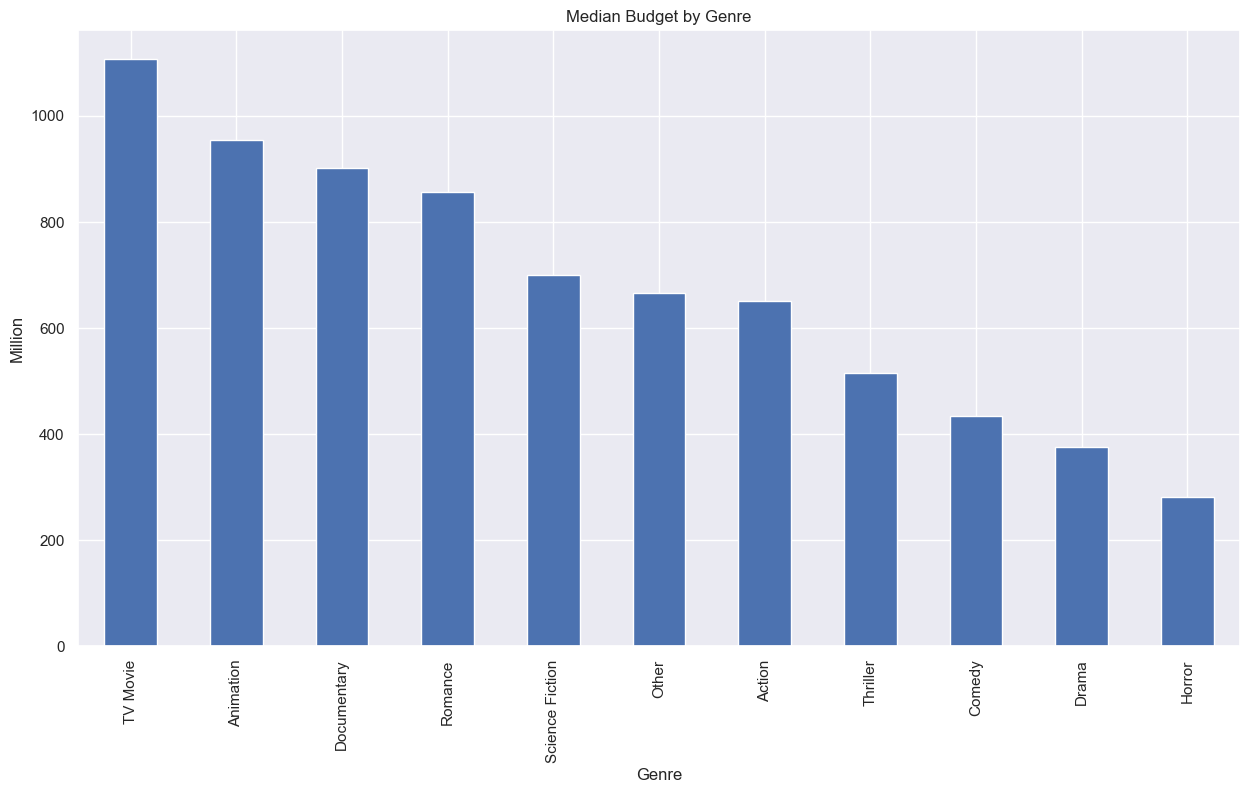

In [57]:
df_genres = df_replaced[df_replaced['year'] >=2000]

df_gmed = df_genres.groupby('primary_genre')['budget_mil'].median().sort_values(ascending=False)
df_gmed.plot(kind='bar')

plt.title('Median Budget by Genre')
plt.ylabel('Million')
plt.xlabel('Genre')

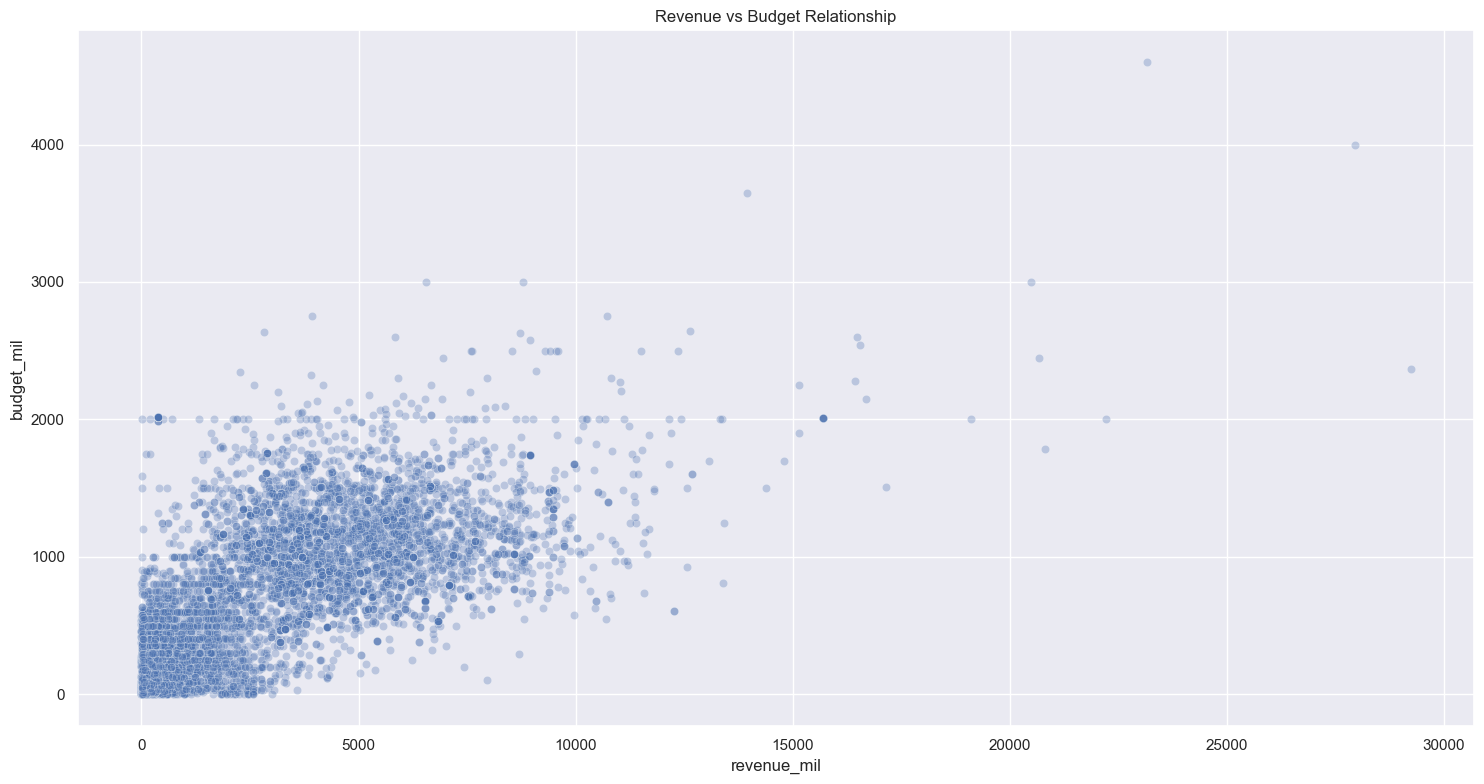

In [58]:
sns.scatterplot(
    x="revenue_mil", 
    y="budget_mil",
    data=df_adj,
    alpha=0.3)
plt.title('Revenue vs Budget Relationship')

plt.tight_layout()

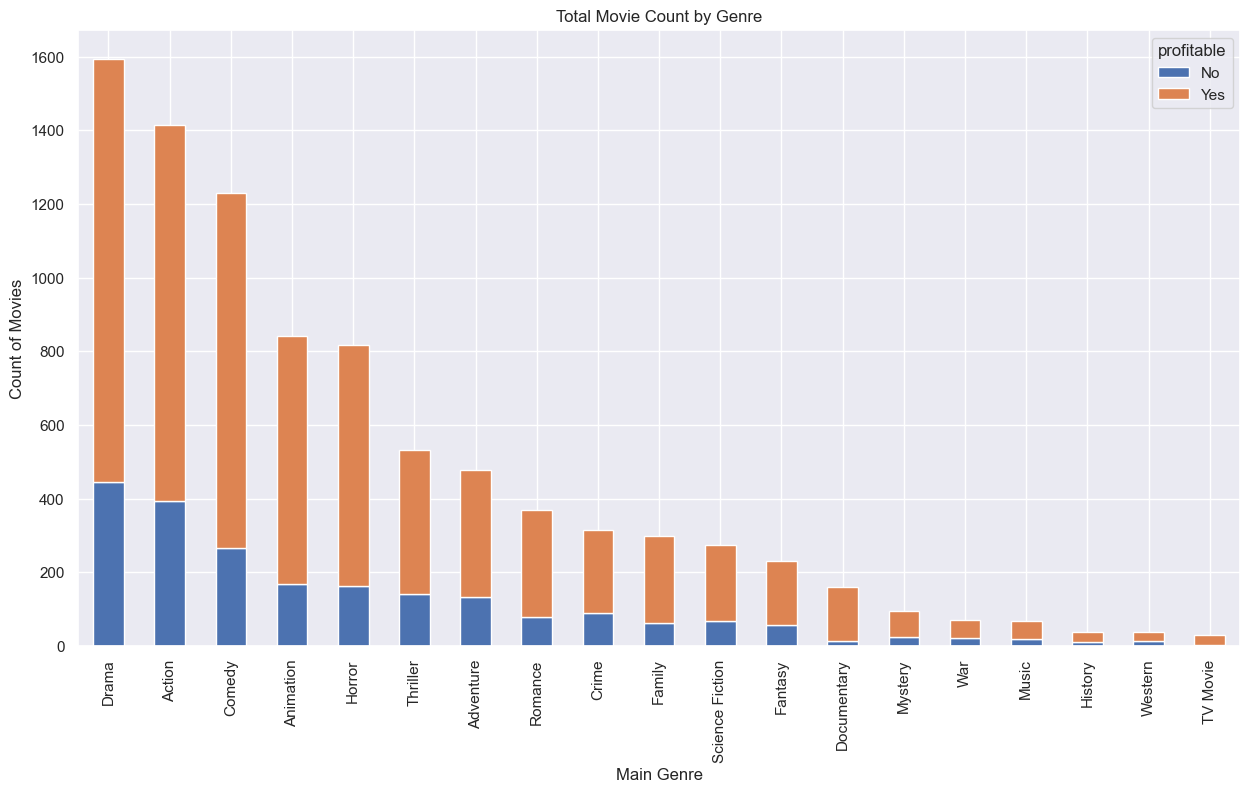

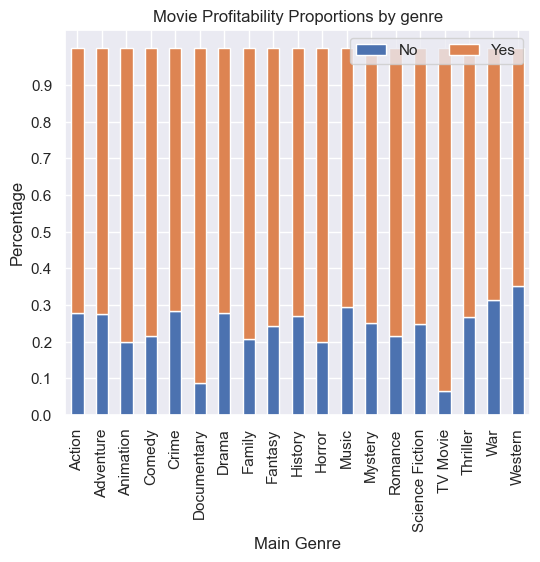

In [59]:
grouped = df_adj.groupby(['primary_genre','profitable']).size().unstack()
sorted_df = grouped.sum(axis=1).sort_values(ascending=False)
grouped_sorted = grouped.loc[sorted_df.index]
grouped_sorted.plot(kind='bar', stacked=True)
plt.xlabel("Main Genre")
plt.ylabel("Count of Movies")
plt.title('Total Movie Count by Genre')

cross_tab_prop = pd.crosstab(index=df_adj['primary_genre'],
                             columns=df_adj['profitable'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True,  
                    figsize=(6, 5))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Main Genre")
plt.ylabel("Percentage")
plt.yticks(np.arange(0.0, 1.0, 0.1))
plt.title('Movie Profitability Proportions by genre')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

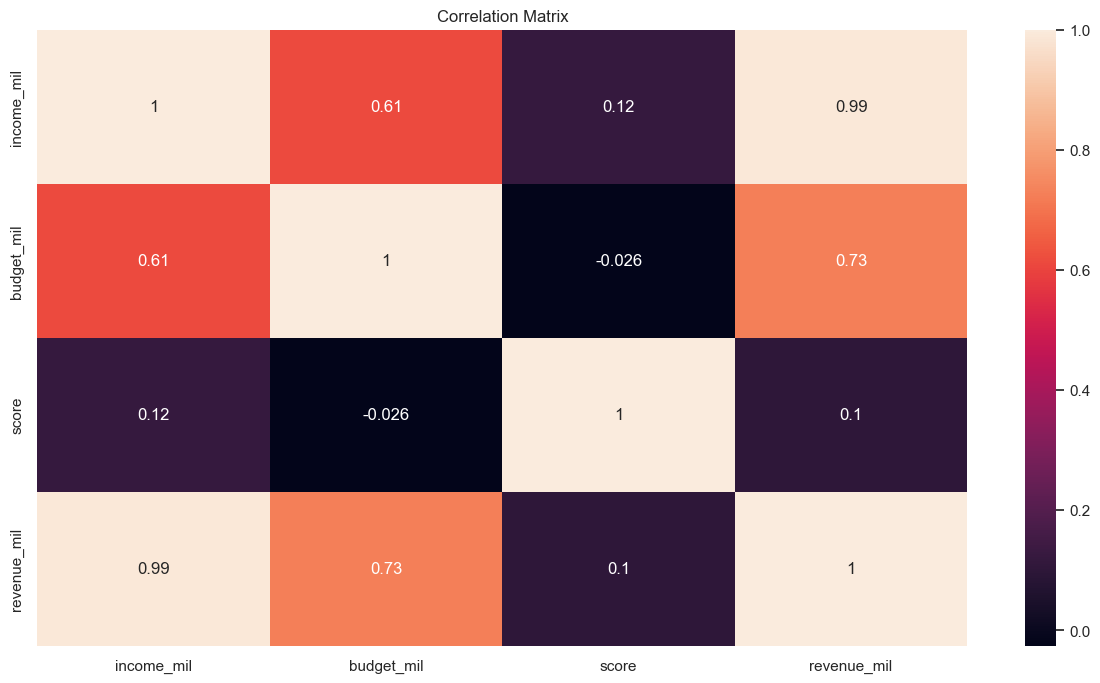

In [60]:
df_corr = df_adj[['income_mil','budget_mil','score','revenue_mil']].corr()
sns.heatmap(df_corr, annot=True).set_title('Correlation Matrix')

In [61]:
df.columns

Index(['names', 'date', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_mil', 'revenue_mil', 'release_country',
       'Release_year', 'Release_month', 'income_mil', 'year', 'primary_genre',
       'budget_tier', 'profitable'],
      dtype='object')

In [63]:
# importing basic libraries for model building

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
import xgboost as xgb

In [65]:
# done some data processing for model building
df = pd.concat([df, df['genre'].str.get_dummies(',')], axis=1)

In [70]:
val1=df.iloc[:,14:]
val2=df.loc[:,["score","budget_mil"]]

new_data=pd.concat([val1,val2],axis=1)

In [69]:
df.columns

Index(['names', 'date', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_mil', 'revenue_mil', 'release_country',
       'Release_year', 'Release_month', 'income_mil', 'year', 'primary_genre',
       'budget_tier', 'profitable', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', ' Action', ' Adventure',
       ' Animation', ' Comedy', ' Crime', ' Documentary', ' Drama', ' Family',
       ' Fantasy', ' History', ' Horror', ' Music', ' Mystery', ' Romance',
       ' Science Fiction', ' TV Movie', ' Thriller', ' War', ' Western'],
      dtype='object')

In [77]:
import pandas as pd

# Assuming df is your pandas DataFrame

# Make sure all columns are numeric
numeric_columns = df.select_dtypes(include=['number']).columns

correlation_data = []

for i in numeric_columns:
    if i != "revenue_mil":  # Exclude the target column
        correlation = df["revenue_mil"].corr(df[i])
        correlation_data.append({'Feature': i, 'Correlation with revenue_mil': correlation})

correlation_df = pd.DataFrame(correlation_data)
correlation_df


,Feature,Correlation with revenue_mil
0,score,0.080975
1,budget_mil,0.730661
2,Release_year,0.165444
3,Release_month,0.023447
4,income_mil,0.988157
5,year,0.165444
6,Action,-0.022162
7,Adventure,0.004695
8,Animation,0.155485
9,Comedy,-0.067816


In [89]:
umerical=["budget_mil","score","Release_year"]

#  initialize the  independent values in "x"  _________dependent or target in "y"

x = df[["budget_mil","score","Release_year"]]
y = df["revenue_mil"]

In [90]:
# split the x,y train and test data  using "train_test_split"   20% ---> test  :  80% ---> train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

print(x_train.shape,x_test.shape)

(6988, 3) (1748, 3)


In [91]:
# Initialize the required model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200,ccp_alpha=0.1,criterion="poisson",min_samples_split=60)     

model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 1.5,
                max_depth = 300, alpha = 2, n_estimators = 10)

In [92]:
# fit the dependent and independent data to the model
model.fit(x_train,y_train)

RandomForestRegressor(ccp_alpha=0.1, criterion='poisson', min_samples_split=60,
                      n_estimators=200)

In [97]:
model_xgb.fit(x_train,y_train)

XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=300, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [99]:
# make prediction by using train dataset
score = model.predict(x_train)
score_xgb = model_xgb.predict(x_train)

In [100]:
# make prediction by using test dataset
score_in_test =  model.predict(x_test)
xgb_score_in_test= model_xgb.predict(x_test)

In [101]:
from sklearn import metrics  

In [102]:
# use the train data score to find accuracy

model_score= metrics.mean_squared_error(y_train,score)                             # Randomforest regression 
model_score_xgb= metrics.mean_squared_error(y_train,score_xgb)                     # XGBOSTER

r2_score= metrics.r2_score(y_train,score)                                           # Randomforest regression 
r2_score_xgb=  metrics.r2_score(y_train,score_xgb)     

In [103]:
# use the test data score to find accuracy


model_score_test= metrics.mean_squared_error(y_test,score_in_test)                    # Randomforest regression 
model_score_xgb_test= metrics.mean_squared_error(y_test,xgb_score_in_test)            # XGBOSTER

r2_score_test = metrics.r2_score(y_test,score_in_test)                                 # Randomforest regression 
r2_score_xgb_test =  metrics.r2_score(y_test,xgb_score_in_test)  

In [104]:
print("Mean squared error in Random forest: \n","\ntrain data :",model_score,"\ntest data: ",model_score_test)
print("\n\nR2 score in Random forest: \n","\ntrain data :",r2_score,"\ntest data: ",r2_score_test)
print("\n\n")
print("Mean squared error in XGBoost : \n","\ntrain data :",model_score_xgb,"\ntest data: ",model_score_xgb_test)
print("\n\nR2 score in  XGBoost: \n","\ntrain data :",r2_score_xgb,"\ntest data: ",r2_score_xgb_test)

Mean squared error in Random forest: 
 
train data : 2081765.797885217 
test data:  2316667.4600530397


R2 score in Random forest: 
 
train data : 0.7325483820955548 
test data:  0.69761997450708



Mean squared error in XGBoost : 
 
train data : 2567533.488678293 
test data:  2842058.6068941625


R2 score in  XGBoost: 
 
train data : 0.6701401347507794 
test data:  0.6290439742329899


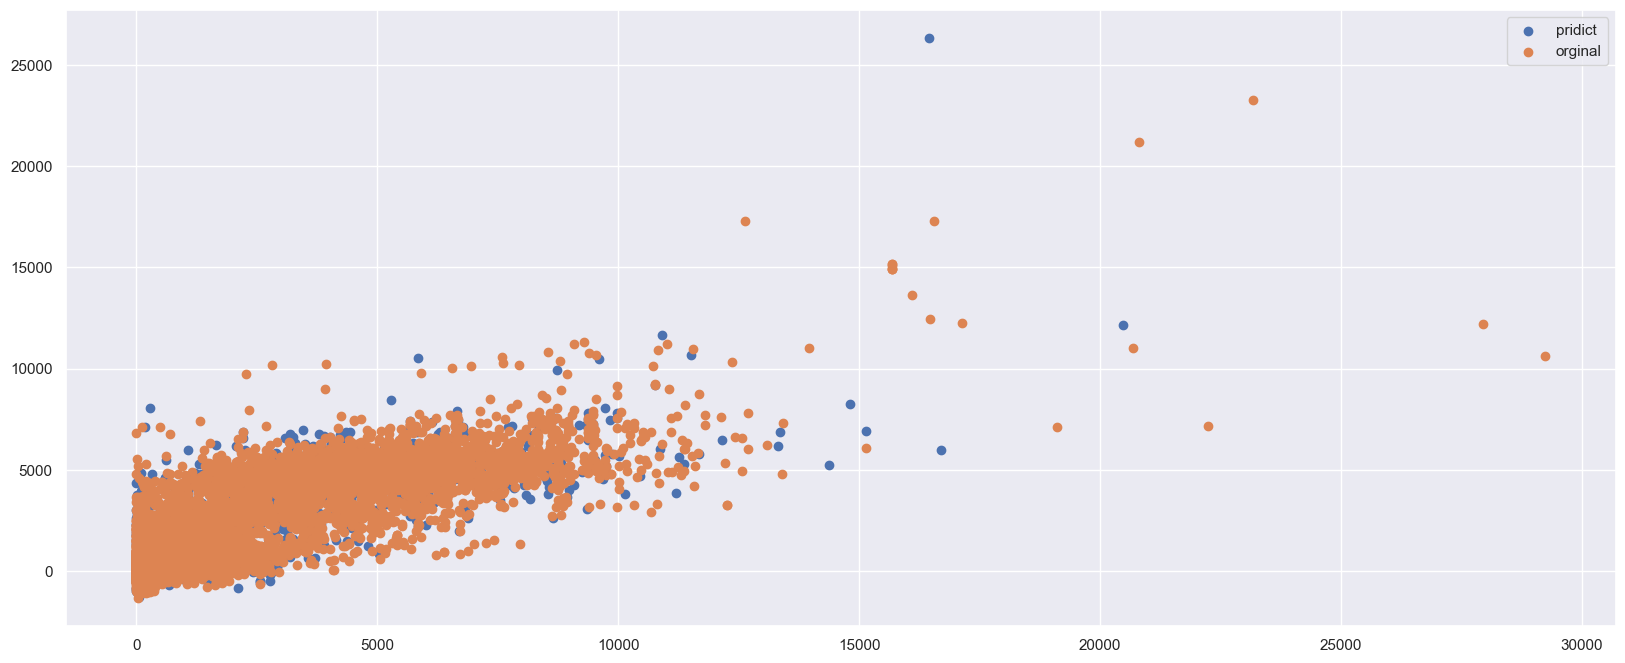

In [105]:
plt.figure(figsize=(20,8))
plt.scatter(y_test,xgb_score_in_test)
plt.scatter(y_train,score_xgb)
plt.legend(["pridict","orginal"])

plt.show()

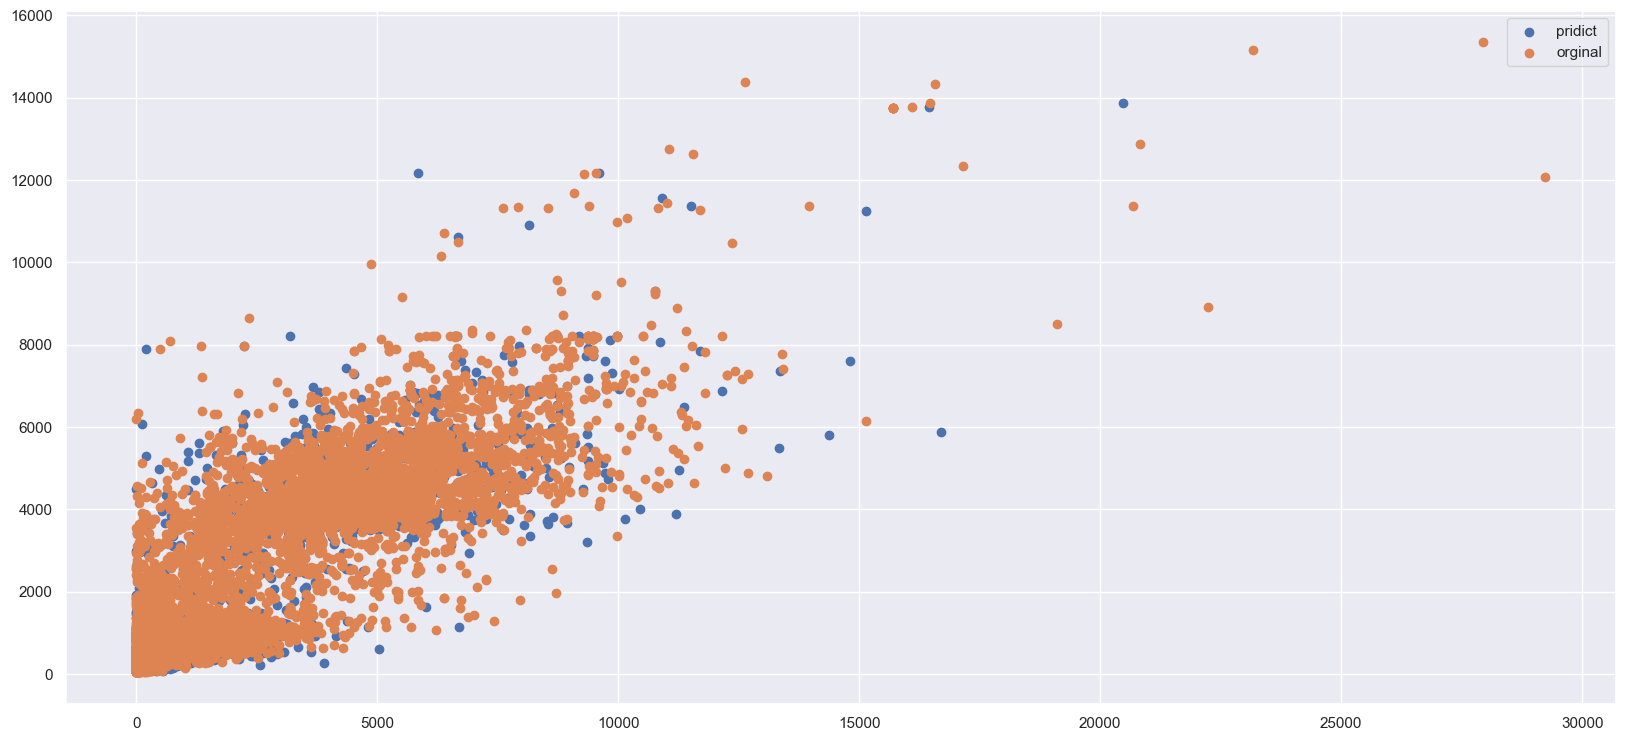

In [106]:
plt.figure(figsize=(20,9))
plt.scatter(y_test,score_in_test)
plt.scatter(y_train,score)
plt.legend(["pridict","orginal"])

plt.show()